<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/TF_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
data = load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33,random_state=101)

In [69]:
N, D = X_train.shape

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [72]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [74]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [75]:
batch_size = 32

r = model.fit(
    train_dataset.batch(batch_size),
    epochs=15,
    validation_data=test_dataset.batch(batch_size)
)


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6935 - loss: 0.5869 - val_accuracy: 0.9149 - val_loss: 0.4042
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.3548 - val_accuracy: 0.9149 - val_loss: 0.2846
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.2477 - val_accuracy: 0.9309 - val_loss: 0.2284
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1928 - val_accuracy: 0.9309 - val_loss: 0.1978
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.1611 - val_accuracy: 0.9362 - val_loss: 0.1787
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1403 - val_accuracy: 0.9362 - val_loss: 0.1655
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1254 - val_accuracy: 0.9309 - val_loss: 0.1555
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9750 - loss: 0.1138 - val_accuracy: 0.9362 - val_loss

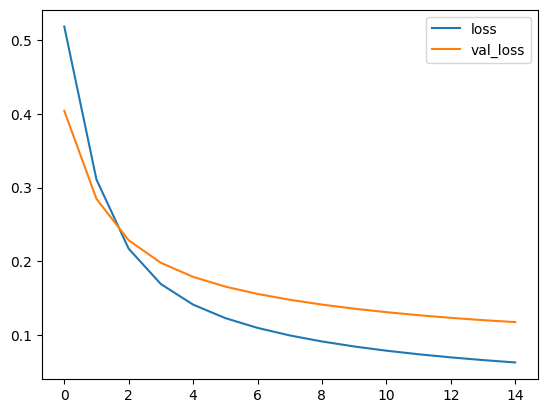

In [76]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

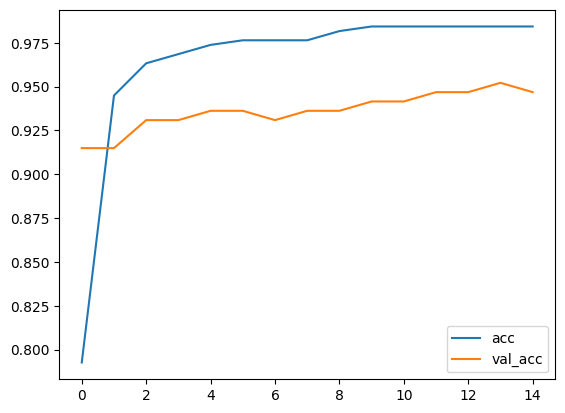

In [77]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()